![example](images/director_shot.jpeg)

# Movies for Microsoft

**By** Jinsol Cantrall

## Overview

What does it mean to be successful in business? How can you measure success? According to Google, 'Success is running a profitable firm that conducts business.' So in order for business to be successful, money is going to be the most important factor to measure the success.

Movies are one of our all time favorite entertainment businesses that have been growing since it was invented. This industry has been known for creating billions of dollars until today. According to the wikipedia, “The worldwide theatrical market had a box office of US$42.2 billion in 2019.”

 In this report, with the datasets from the we will take a closer look at the profitable factors to create a movie.

## Business Problem

Microsoft stakeholders have noticed their competitors creating original video content. In response, Microsoft has decided to create a new movie studio, but they are unfamiliar with the film sector. I have been given several datasets, and are asked to put together a report on the movie industry that will allow Microsoft producers to make informed decisions.

#### "What is a successful film?"
1. The most **profitable** - money
2. The most **popular** - ratings

##### Questions to ask:
* Question 1: Is it profitable to create film? 
* Question 2: Which genres of movie made most popular? 
* Question 3: Does the large budget movie brings more money?
* Question 4: Running time could be a huge factor of popularity of the movie?


## Data Understanding
Following datasets are used for analysis.

1. The Numbers (budgets)
2. iMDB (titles)
3. iMDB (ratings)

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')

#### Importing data

In [2]:
df1 = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
df2 = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
df3 = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')

## Data Preparation

#### The Numbers (budget) - df1

In [3]:
df1.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
#checking data types
df1.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [5]:
#is there any null value?
df1.isnull().sum() 

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [6]:
#is there any duplicates?
df1['movie'].duplicated().sum()

84

In [7]:
df1['duplit'] = df1.movie.duplicated(keep=False)
df1[df1['duplit'] == True].sort_values(by = ['movie']).head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,duplit
4270,71,"Dec 23, 1954","20,000 Leagues Under the Sea","$5,000,000","$28,200,000","$28,200,000",True
5614,15,"Dec 24, 1916","20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000",True
1648,49,"Apr 30, 2010",A Nightmare on Elm Street,"$35,000,000","$63,075,011","$117,729,621",True
5016,17,"Nov 9, 1984",A Nightmare on Elm Street,"$1,800,000","$25,504,513","$25,504,513",True
2032,33,"Nov 11, 1992",Aladdin,"$28,000,000","$217,350,219","$504,050,219",True


When I checked for any duplicates, it seemed like there were 84 duplicates in 'movie' column. 
After inspecting all the rows with the same 'movie'(changed back to show only 5 rows), it seems like the release date was different. 
Therefore, no actual duplicates in this dataset.

In [8]:
#dropping unnecessary column(s)
df1.drop(['id', 'duplit'], axis=1, inplace=True)

In [9]:
#changing str to int
df1['production_budget'] = df1['production_budget'].str.replace(',', '')
df1['production_budget'] = df1['production_budget'].str.replace('$', '')
df1['production_budget'] = df1['production_budget'].astype(int)

In [10]:
df1['domestic_gross'] = df1['domestic_gross'].str.replace(',', '')
df1['domestic_gross'] = df1['domestic_gross'].str.replace('$', '')
df1['domestic_gross'] = df1['domestic_gross'].astype(int)

In [11]:
df1['worldwide_gross'] = df1['worldwide_gross'].str.replace(',', '')
df1['worldwide_gross'] = df1['worldwide_gross'].str.replace('$', '')
df1['worldwide_gross'] = df1['worldwide_gross'].astype('int64')

In [12]:
#changing release date to datetime
df1['release_date']= pd.to_datetime(df1['release_date'])

In [13]:
df1.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,Avatar,425000000,760507625,2776345279
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [14]:
#adding domestic gross and worldwide gross to see the total gross
total_gross = df1['domestic_gross'] + df1["worldwide_gross"]

In [15]:
df1["total_gross"] = total_gross

In [16]:
df1.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross
0,2009-12-18,Avatar,425000000,760507625,2776345279,3536852904
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,192524700
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129


In [17]:
#subtrating total_gross from production budget
net_gross = df1['total_gross'] - df1["production_budget"]

In [18]:
df1["net_gross"] = net_gross

In [19]:
df1.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_gross
0,2009-12-18,Avatar,425000000,760507625,2776345279,3536852904,3111852904
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,192524700,-157475300
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129


In [20]:
#renive scientific notation
pd.set_option('display.float_format', lambda x: '%1f' % x) 

In [21]:
df1.describe()

,production_budget,domestic_gross,worldwide_gross,total_gross,net_gross
count,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000
mean,31587757.096506,41873326.867001,91487460.906434,133360787.773435,101773030.676928
std,41812076.826943,68240597.356904,174719968.778905,239941100.176362,210887977.781350
min,1100.000000,0.000000,0.000000,0.000000,-157475300.000000
25%,5000000.000000,1429534.500000,4125414.750000,6448924.000000,-309822.250000
50%,17000000.000000,17225945.000000,27984448.500000,46058546.000000,24995377.500000
75%,40000000.000000,52348661.500000,97645836.500000,150693736.750000,111164787.500000
max,425000000.000000,936662225.000000,2776345279.000000,3536852904.000000,3111852904.000000


In [22]:
df1.sort_values(by = ['net_gross'], ascending=True, inplace= True)

In [23]:
df1.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_gross
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,192524700,-157475300
194,2020-12-31,Moonfall,150000000,0,0,0,-150000000
341,2019-06-14,Men in Black: International,110000000,3100000,3100000,6200000,-103800000
479,2017-12-13,Bright,90000000,0,0,0,-90000000
480,2019-12-31,Army of the Dead,90000000,0,0,0,-90000000


#### iMDB (titles) - df2 & iMDB (ratings) -df3

In [24]:
df2.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy"


In [25]:
df3.head()

,tconst,averagerating,numvotes
0,tt10356526,8.300000,31
1,tt10384606,8.900000,559
2,tt1042974,6.400000,20
3,tt1043726,4.200000,50352
4,tt1060240,6.500000,21


In [26]:
#seeing if tconst is unique identifier
display(pd.Series(df2["tconst"]).is_unique)
display(pd.Series(df3["tconst"]).is_unique)

True

True

In [27]:
df2.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [28]:
df3.describe()

,averagerating,numvotes
count,73856.000000,73856.000000
mean,6.332729,3523.662167
std,1.474978,30294.022971
min,1.000000,5.000000
25%,5.500000,14.000000
50%,6.500000,49.000000
75%,7.400000,282.000000
max,10.000000,1841066.000000


In [29]:
#merging two datasets
imdb = pd.merge(df2, df3, how='inner', on='tconst')

In [30]:
imdb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama",7.000000,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama",7.200000,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama,6.900000,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama",6.100000,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy",6.500000,119


In [31]:
#checking if it merged correctly
df2.loc[df2['tconst'] == "tt0063540"]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama"


In [32]:
df3.loc[df3['tconst'] == "tt0063540"]

,tconst,averagerating,numvotes
36049,tt0063540,7.000000,77


In [33]:
imdb.loc[imdb['tconst'] == "tt0063540"]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama",7.000000,77


In [34]:
#check duplicates
(imdb.duplicated(['primary_title'])).value_counts()

False    69993
True      3863
dtype: int64

In [35]:
(imdb.duplicated(['start_year'])).value_counts()

True     73846
False       10
dtype: int64

In [36]:
(imdb.duplicated(['primary_title', 'start_year'])).value_counts()

False    73271
True       585
dtype: int64

In [37]:
df = imdb.sort_values(by=['primary_title', 'numvotes'], ascending = False)

In [38]:
df[(df.duplicated(['primary_title', 'start_year'], keep=False))]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
56862,tt5815346,Zoom,Zoom,2016,158.000000,"Comedy,Drama,Romance",7.200000,85
62945,tt6667868,Zoom,Zoom,2016,nan,Horror,5.400000,17
49080,tt4842680,Zeus,Zeus,2016,115.000000,"Biography,Drama,History",6.500000,44
58771,tt6066078,Zeus,Zeus,2016,105.000000,Drama,7.300000,30
23668,tt2380333,Worm,Worm,2013,93.000000,"Horror,Romance,Sci-Fi",6.200000,85
...,...,...,...,...,...,...,...,...
44816,tt4312624,21 Days,21 den,2014,70.000000,Documentary,6.000000,5
43070,tt4119270,1989,1989,2014,97.000000,"Documentary,History,Thriller",7.500000,175
39371,tt3735338,1989,1989,2014,54.000000,Documentary,6.800000,5
12111,tt1855110,180,180,2011,121.000000,"Drama,Romance",6.000000,688


In [39]:
# If I keep first of the duplicates
1135/2

567.5

In [40]:
567.5/len(imdb)

0.0076838713171577125

In [41]:
#I think 0.7% is low enough to drop
df.drop_duplicates(['primary_title', 'start_year'], keep = 'first', inplace = True)

In [42]:
(df.duplicated(['primary_title', 'start_year'])).value_counts()

False    73271
dtype: int64

In [43]:
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
45325,tt4373884,Šiška Deluxe,Siska Deluxe,2015,108.000000,"Comedy,Drama",6.300000,384
36816,tt3509772,ärtico,ärtico,2014,78.000000,Drama,6.600000,101
52301,tt5217114,à propos: philosophie,à propos: philosophie,2016,80.000000,Documentary,8.200000,5
45685,tt4422510,"Üç, Iki, Bir... Kestik!","Üç, Iki, Bir... Kestik!",2014,92.000000,Comedy,4.300000,88
71004,tt8514766,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,2018,80.000000,"Comedy,Horror,Thriller",4.800000,51


In [44]:
df.dtypes

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
dtype: object

In [45]:
#dropping columns
genre_a = df.drop(columns = ['tconst', 'original_title', 'start_year'])

In [46]:
genre_a.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes
45325,Šiška Deluxe,108.000000,"Comedy,Drama",6.300000,384
36816,ärtico,78.000000,Drama,6.600000,101
52301,à propos: philosophie,80.000000,Documentary,8.200000,5
45685,"Üç, Iki, Bir... Kestik!",92.000000,Comedy,4.300000,88
71004,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,80.000000,"Comedy,Horror,Thriller",4.800000,51


In [47]:
genre_a = genre_a.sort_values(by=['numvotes'], ascending = False)

In [48]:
genre_a.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes
2387,Inception,148.000000,"Action,Adventure,Sci-Fi",8.800000,1841066
2241,The Dark Knight Rises,164.000000,"Action,Thriller",8.400000,1387769
280,Interstellar,169.000000,"Adventure,Drama,Sci-Fi",8.600000,1299334
12072,Django Unchained,165.000000,"Drama,Western",8.400000,1211405
325,The Avengers,143.000000,"Action,Adventure,Sci-Fi",8.100000,1183655


In [49]:
#how many null values in genres column?
genre_a['genres'].isna().sum() 

792

In [50]:
796/len(genre_a) 

0.010863779667262628

In [51]:
# dropping null values from genres since it's only 1%
genre_a = genre_a.dropna(subset=['genres']) 

In [52]:
#checking if it was dropped
genre_a['genres'].isna().sum()

0

In [53]:
genre_a.dtypes 

primary_title       object
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
dtype: object

In [54]:
#spliting genres
genre_a['genre_convert'] = genre_a['genres'].str.split(',')

In [55]:
genre_a.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes,genre_convert
2387,Inception,148.000000,"Action,Adventure,Sci-Fi",8.800000,1841066,"[Action, Adventure, Sci-Fi]"
2241,The Dark Knight Rises,164.000000,"Action,Thriller",8.400000,1387769,"[Action, Thriller]"
280,Interstellar,169.000000,"Adventure,Drama,Sci-Fi",8.600000,1299334,"[Adventure, Drama, Sci-Fi]"
12072,Django Unchained,165.000000,"Drama,Western",8.400000,1211405,"[Drama, Western]"
325,The Avengers,143.000000,"Action,Adventure,Sci-Fi",8.100000,1183655,"[Action, Adventure, Sci-Fi]"


In [56]:
#extracting all the gerens that are listed in genres column
all_genres = []
for glist in genre_a['genre_convert']:
    for item in glist:
        all_genres.append(item)

In [57]:
all_genres

['Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Thriller',
 'Adventure',
 'Drama',
 'Sci-Fi',
 'Drama',
 'Western',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Biography',
 'Crime',
 'Drama',
 'Mystery',
 'Thriller',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Drama',
 'Mystery',
 'Thriller',
 'Adventure',
 'Family',
 'Fantasy',
 'Drama',
 'Sci-Fi',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Adventure',
 'Animation',
 'Comedy',
 'Adventure',
 'Drama',
 'Sci-Fi',
 'Biography',
 'Comedy',
 'Drama',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Comedy',
 'Crime',
 'Action'

In [58]:
#creating list of genres by sorting
genres_lists = sorted(set(all_genres))

In [59]:
genres_lists

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [119]:
#creating dictionary
genre_sum = {}
for genre in genres_lists:
    genre_sum[genre] = genre_a[genre].sum()

In [120]:
genre_sum

{'Action': 6940,
 'Adult': 3,
 'Adventure': 3797,
 'Animation': 1740,
 'Biography': 3791,
 'Comedy': 17213,
 'Crime': 4574,
 'Documentary': 17654,
 'Drama': 30474,
 'Family': 3384,
 'Fantasy': 2114,
 'Game-Show': 2,
 'History': 2815,
 'Horror': 7598,
 'Music': 2629,
 'Musical': 717,
 'Mystery': 3005,
 'News': 574,
 'Reality-TV': 17,
 'Romance': 6539,
 'Sci-Fi': 2188,
 'Short': 1,
 'Sport': 1173,
 'Thriller': 8125,
 'War': 850,
 'Western': 278}

In [61]:
#creating colums with genres from genre_lists by using 0
for col in genres_lists:
    genre_a[col] = 0

In [62]:
genre_a.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes,genre_convert,Action,Adult,Adventure,Animation,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
2387,Inception,148.000000,"Action,Adventure,Sci-Fi",8.800000,1841066,"[Action, Adventure, Sci-Fi]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2241,The Dark Knight Rises,164.000000,"Action,Thriller",8.400000,1387769,"[Action, Thriller]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280,Interstellar,169.000000,"Adventure,Drama,Sci-Fi",8.600000,1299334,"[Adventure, Drama, Sci-Fi]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12072,Django Unchained,165.000000,"Drama,Western",8.400000,1211405,"[Drama, Western]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
325,The Avengers,143.000000,"Action,Adventure,Sci-Fi",8.100000,1183655,"[Action, Adventure, Sci-Fi]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
#using 1, selecting genre in genres column by loops

#getting row/index number for each row
for row in genre_a.index:
    #looking at each genre individually
    for genres in genres_lists:
        #if that genre is in the cell
        if genres in genre_a['genres'][row]:
            #change 0 to 1
            genre_a[genres][row] = 1

C:\Users\9123\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [64]:
genre_a.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes,genre_convert,Action,Adult,Adventure,Animation,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
2387,Inception,148.000000,"Action,Adventure,Sci-Fi",8.800000,1841066,"[Action, Adventure, Sci-Fi]",1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2241,The Dark Knight Rises,164.000000,"Action,Thriller",8.400000,1387769,"[Action, Thriller]",1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
280,Interstellar,169.000000,"Adventure,Drama,Sci-Fi",8.600000,1299334,"[Adventure, Drama, Sci-Fi]",0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
12072,Django Unchained,165.000000,"Drama,Western",8.400000,1211405,"[Drama, Western]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
325,The Avengers,143.000000,"Action,Adventure,Sci-Fi",8.100000,1183655,"[Action, Adventure, Sci-Fi]",1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [65]:
df.rename(columns = {'primary_title' : 'movie'}, inplace =True)

In [66]:
df.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
45325,tt4373884,Šiška Deluxe,Siska Deluxe,2015,108.000000,"Comedy,Drama",6.300000,384
36816,tt3509772,ärtico,ärtico,2014,78.000000,Drama,6.600000,101
52301,tt5217114,à propos: philosophie,à propos: philosophie,2016,80.000000,Documentary,8.200000,5
45685,tt4422510,"Üç, Iki, Bir... Kestik!","Üç, Iki, Bir... Kestik!",2014,92.000000,Comedy,4.300000,88
71004,tt8514766,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,2018,80.000000,"Comedy,Horror,Thriller",4.800000,51


In [67]:
7548/73271

0.10301483533730944

In [68]:
df.isnull().sum() 

tconst                0
movie                 0
original_title        0
start_year            0
runtime_minutes    7548
genres              792
averagerating         0
numvotes              0
dtype: int64

In [69]:
#merging df and df1
genre_budget = pd.merge(df, df1, how='inner', on='movie')

In [70]:
genre_budget.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,total_gross,net_gross
0,tt1293847,xXx: Return of Xander Cage,xXx: Return of Xander Cage,2017,107.000000,"Action,Adventure,Thriller",5.200000,77976,2017-01-20,85000000,44898413,345033359,389931772,304931772
1,tt2249221,Zulu,Zulu,2013,110.000000,"Crime,Drama,Thriller",6.700000,16607,2013-12-31,16000000,0,1844228,1844228,-14155772
2,tt2948356,Zootopia,Zootopia,2016,108.000000,"Adventure,Animation,Comedy",8.000000,383446,2016-03-04,150000000,341268248,1019429616,1360697864,1210697864
3,tt3763866,Zoom,Zoom,2015,96.000000,"Animation,Comedy,Drama",6.100000,2323,2006-08-11,35000000,11989328,12506188,24495516,-10504484
4,tt5815346,Zoom,Zoom,2016,158.000000,"Comedy,Drama,Romance",7.200000,85,2006-08-11,35000000,11989328,12506188,24495516,-10504484


In [71]:
#checking if merge was done correctly
genre_budget.loc[genre_budget['movie'] == "Avatar"]

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,total_gross,net_gross
2543,tt1775309,Avatar,Abatâ,2011,93.000000,Horror,6.100000,43,2009-12-18,425000000,760507625,2776345279,3536852904,3111852904


In [72]:
df.loc[df['movie'] == "Avatar"]

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
9944,tt1775309,Avatar,Abatâ,2011,93.000000,Horror,6.100000,43


In [73]:
df1.loc[df1['movie'] == "Avatar"]

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_gross
0,2009-12-18,Avatar,425000000,760507625,2776345279,3536852904,3111852904


In [74]:
#dropping unnecessary column(s)
genre_budget.drop(['tconst', 'original_title'], axis=1, inplace=True)

In [75]:
#is there any null value?
genre_budget.isnull().sum() 

movie                 0
start_year            0
runtime_minutes      99
genres                5
averagerating         0
numvotes              0
release_date          0
production_budget     0
domestic_gross        0
worldwide_gross       0
total_gross           0
net_gross             0
dtype: int64

In [76]:
genre_budget = genre_budget.dropna(subset=['genres']) 

In [77]:
genre_budget['movie'].duplicated().sum()

615

In [78]:
genre_budget.head()

,movie,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,total_gross,net_gross
0,xXx: Return of Xander Cage,2017,107.000000,"Action,Adventure,Thriller",5.200000,77976,2017-01-20,85000000,44898413,345033359,389931772,304931772
1,Zulu,2013,110.000000,"Crime,Drama,Thriller",6.700000,16607,2013-12-31,16000000,0,1844228,1844228,-14155772
2,Zootopia,2016,108.000000,"Adventure,Animation,Comedy",8.000000,383446,2016-03-04,150000000,341268248,1019429616,1360697864,1210697864
3,Zoom,2015,96.000000,"Animation,Comedy,Drama",6.100000,2323,2006-08-11,35000000,11989328,12506188,24495516,-10504484
4,Zoom,2016,158.000000,"Comedy,Drama,Romance",7.200000,85,2006-08-11,35000000,11989328,12506188,24495516,-10504484


In [79]:
genre_budget[(genre_budget.duplicated(['movie', 'start_year', 'release_date'], keep=False))]

,movie,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,total_gross,net_gross


In [80]:
#it seems like there isn't an actual duplicates

#### Cleaned datasets

In [81]:
df1.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_gross
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,192524700,-157475300
194,2020-12-31,Moonfall,150000000,0,0,0,-150000000
341,2019-06-14,Men in Black: International,110000000,3100000,3100000,6200000,-103800000
479,2017-12-13,Bright,90000000,0,0,0,-90000000
480,2019-12-31,Army of the Dead,90000000,0,0,0,-90000000


In [82]:
df.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
45325,tt4373884,Šiška Deluxe,Siska Deluxe,2015,108.000000,"Comedy,Drama",6.300000,384
36816,tt3509772,ärtico,ärtico,2014,78.000000,Drama,6.600000,101
52301,tt5217114,à propos: philosophie,à propos: philosophie,2016,80.000000,Documentary,8.200000,5
45685,tt4422510,"Üç, Iki, Bir... Kestik!","Üç, Iki, Bir... Kestik!",2014,92.000000,Comedy,4.300000,88
71004,tt8514766,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,2018,80.000000,"Comedy,Horror,Thriller",4.800000,51


In [83]:
genre_budget.head()

,movie,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,total_gross,net_gross
0,xXx: Return of Xander Cage,2017,107.000000,"Action,Adventure,Thriller",5.200000,77976,2017-01-20,85000000,44898413,345033359,389931772,304931772
1,Zulu,2013,110.000000,"Crime,Drama,Thriller",6.700000,16607,2013-12-31,16000000,0,1844228,1844228,-14155772
2,Zootopia,2016,108.000000,"Adventure,Animation,Comedy",8.000000,383446,2016-03-04,150000000,341268248,1019429616,1360697864,1210697864
3,Zoom,2015,96.000000,"Animation,Comedy,Drama",6.100000,2323,2006-08-11,35000000,11989328,12506188,24495516,-10504484
4,Zoom,2016,158.000000,"Comedy,Drama,Romance",7.200000,85,2006-08-11,35000000,11989328,12506188,24495516,-10504484


## Data Modeling

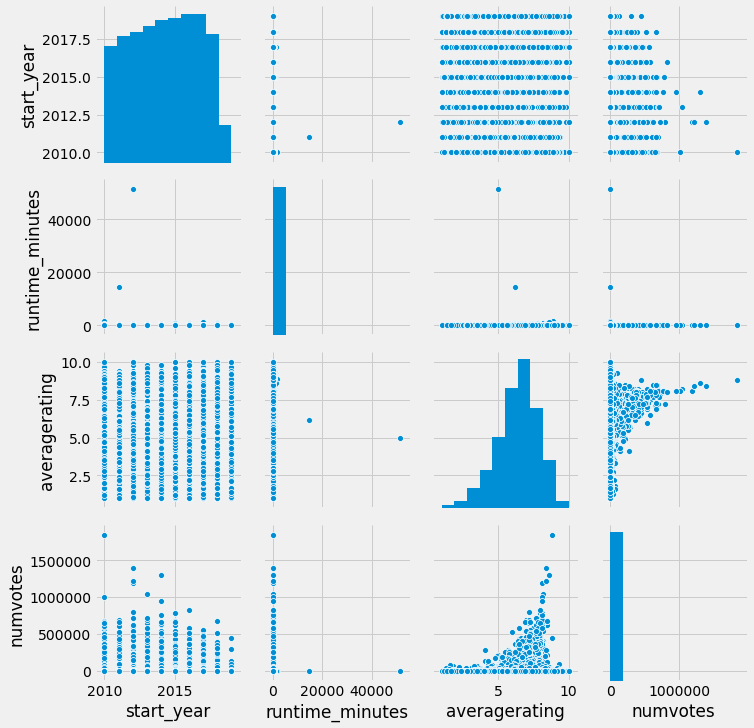

In [84]:
#let's see the overview of each datasets
sns.pairplot(data=df)

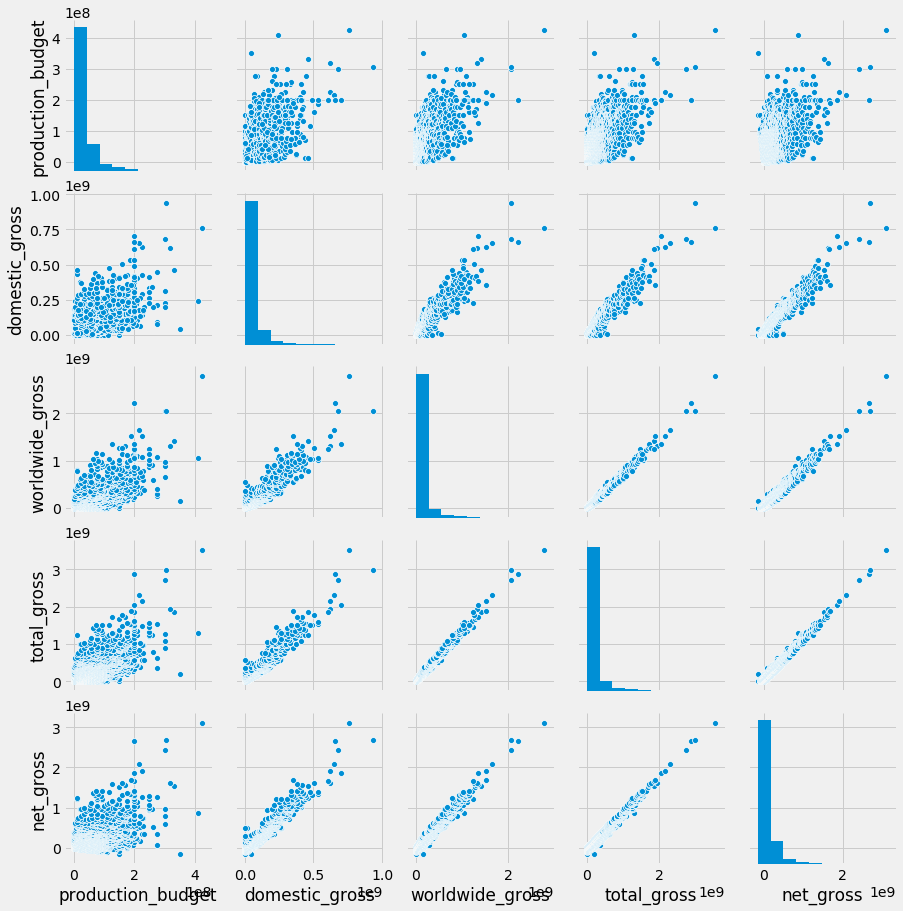

In [85]:
sns.pairplot(data=df1)

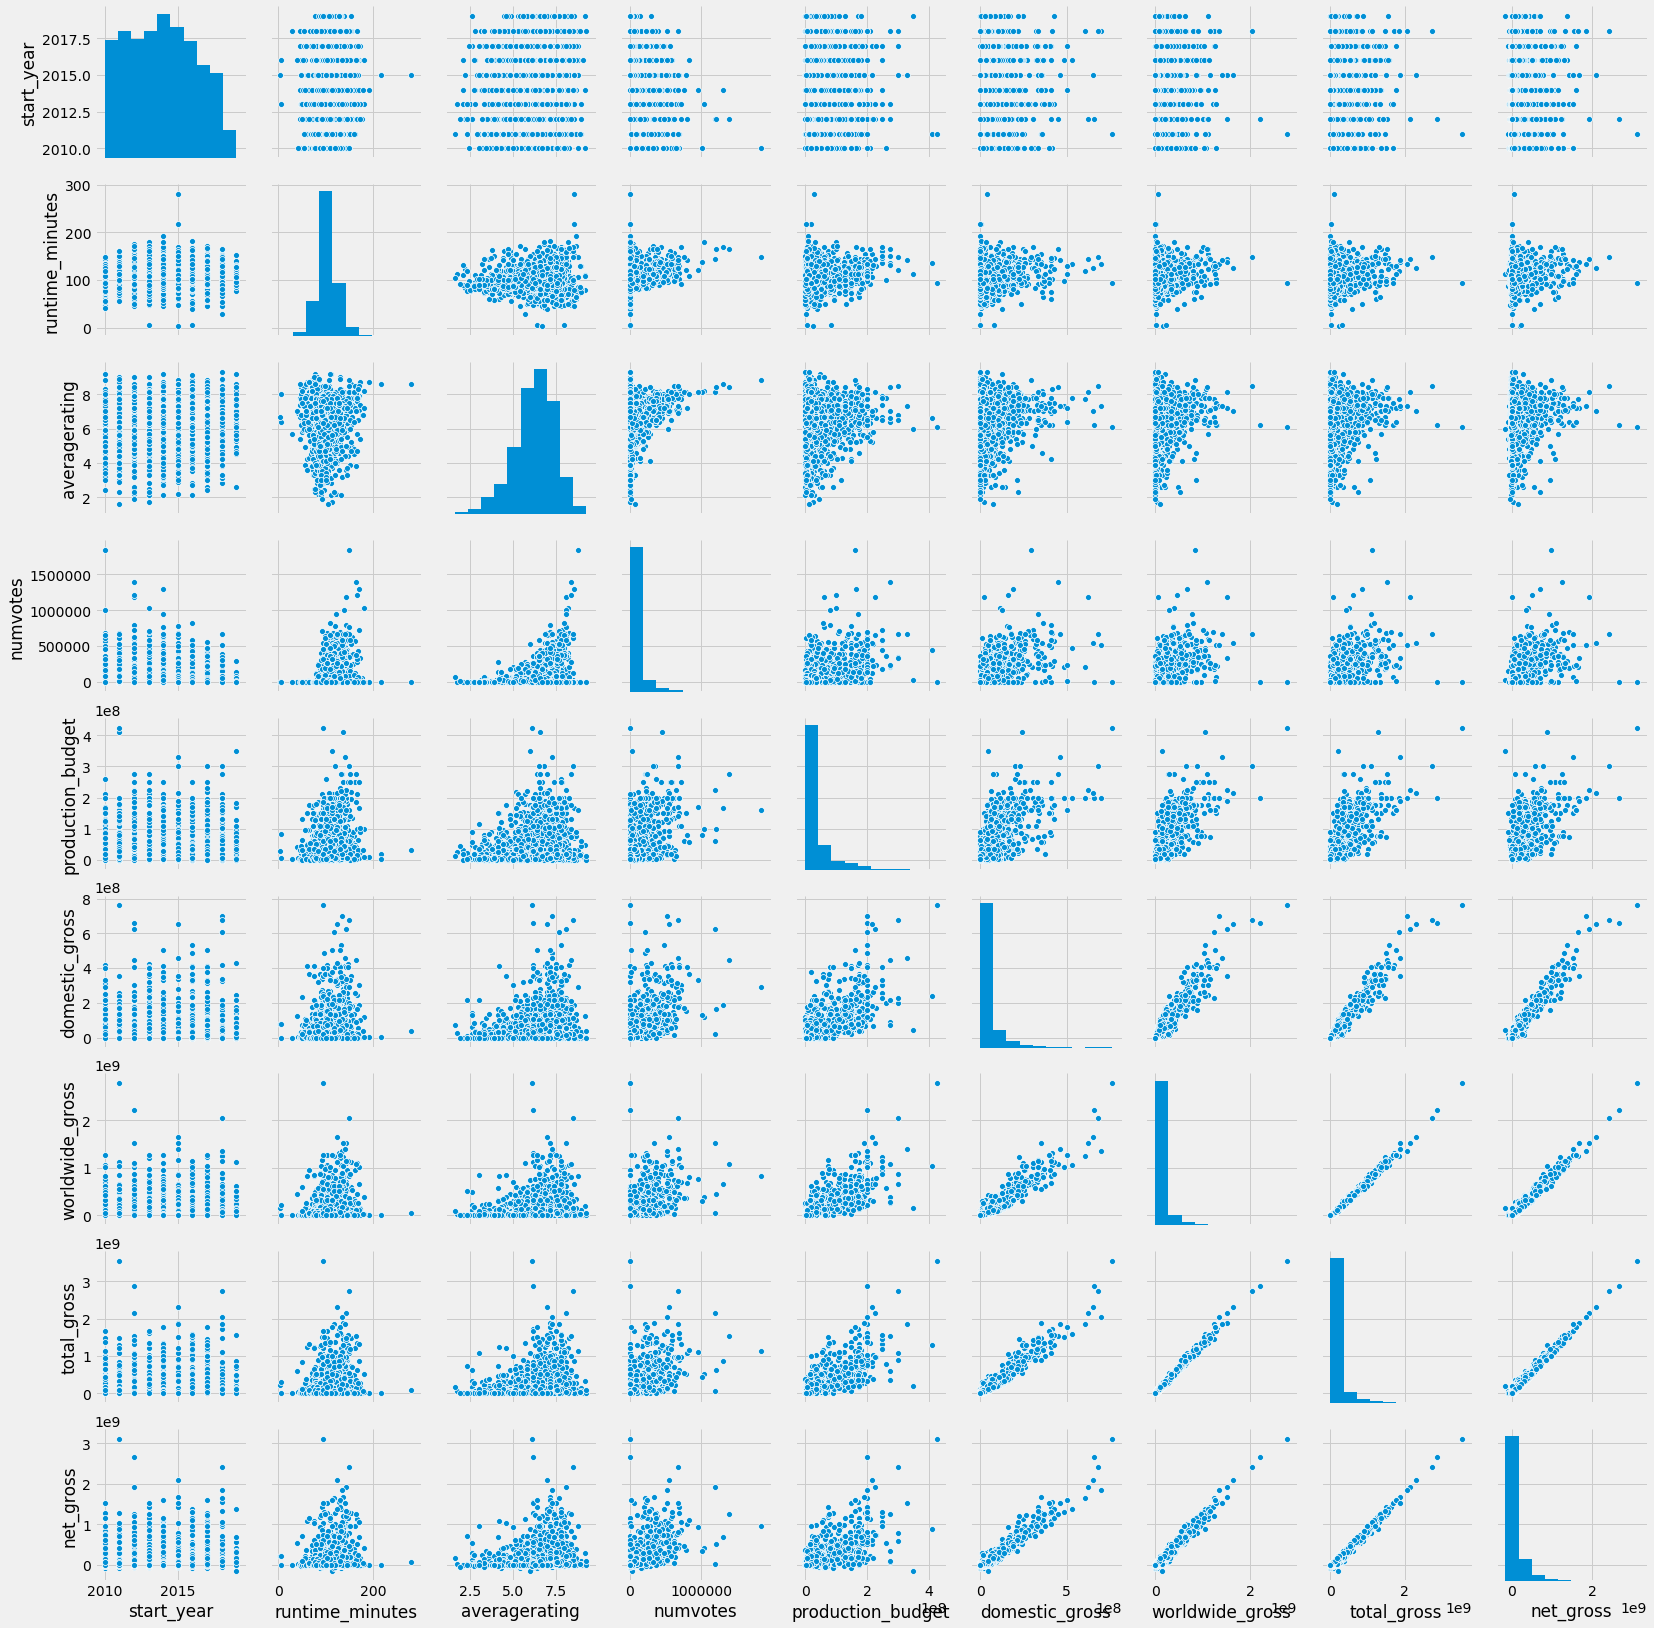

In [86]:
sns.pairplot(data=genre_budget)

In [87]:
#See if movies are profitable

In [88]:
neg = (df1['net_gross'] < 0).sum().sum()
print(neg)
(neg/5782)*100 

1608


27.810446212383262

In [89]:
pos = (df1['net_gross'] > 0).sum().sum()
print(pos)
(pos/5782)*100

4174


72.18955378761675

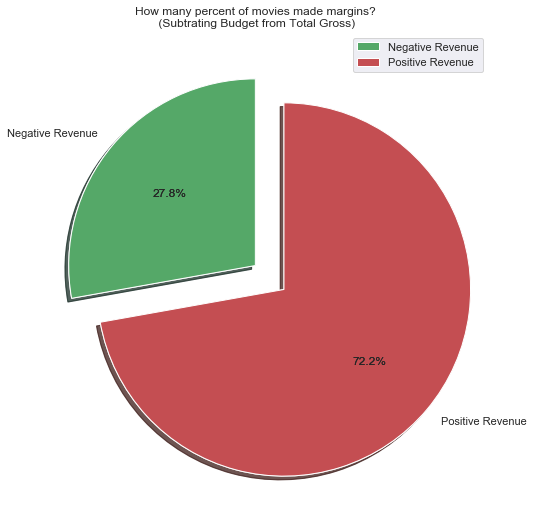

In [134]:
labels = 'Negative Revenue','Positive Revenue'
sizes = [(neg/5782)*100 , (pos/5782)*100]
 

fig1, ax1 = plt.subplots(figsize=(10,8))
explode = (0, 0.2) 


ax1.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
patches, texts, auto = ax1.pie(sizes,  shadow=True, startangle=90,explode=explode, autopct='%1.1f%%' )
 
plt.legend(patches, labels, loc="best")
plt.title("How many percent of movies made margins?\n (Subtrating Budget from Total Gross)")
plt.show()

72.2% of movies made positive revenue. 

In [91]:
rev = genre_budget.groupby(['start_year'])['production_budget', 'total_gross', 'net_gross','domestic_gross', 'worldwide_gross'].mean()
rev

,production_budget,total_gross,net_gross,domestic_gross,worldwide_gross
start_year,,,,,
2010,33716928.114478,135568486.686869,101851558.572391,41605537.303030,93962949.383838
2011,34916050.542320,134940163.626959,100024113.084640,38828256.025078,96111907.601881
2012,34976864.156667,151522481.626667,116545617.470000,43662963.090000,107859518.536667
2013,34829564.915625,142092265.818750,107262700.903125,42202870.328125,99889395.490625
2014,29552934.176309,135346238.884298,105793304.707989,40010860.027548,95335378.856749
2015,28529381.823708,119657301.343465,91127919.519757,35241440.541033,84415860.802432
2016,36876519.908475,161196418.633898,124319898.725424,48309857.620339,112886561.013559
2017,41876263.403433,183664268.459227,141788005.055794,52403014.171674,131261254.287554
2018,38277136.150235,185512425.112676,147235288.962441,54977739.553991,130534685.558685


Text(0, 0.5, 'Dollars per One Hundred Million')

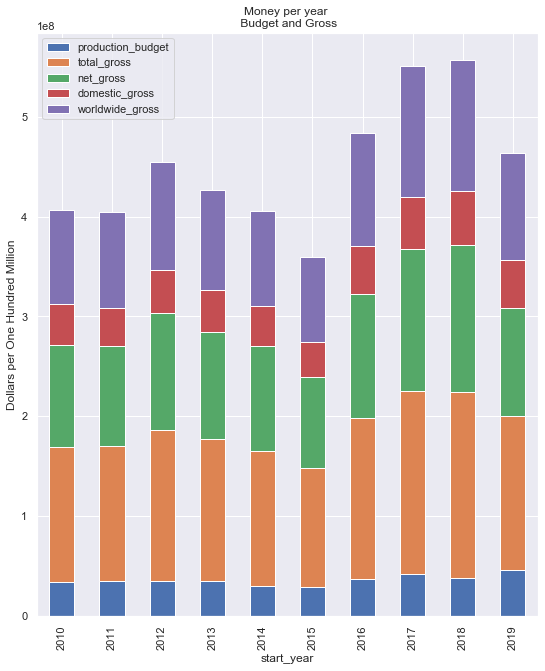

In [133]:
r = rev.plot.bar(stacked=True)
plt.title("Money per year \n Budget and Gross")
plt.ylabel("Dollars per One Hundred Million")

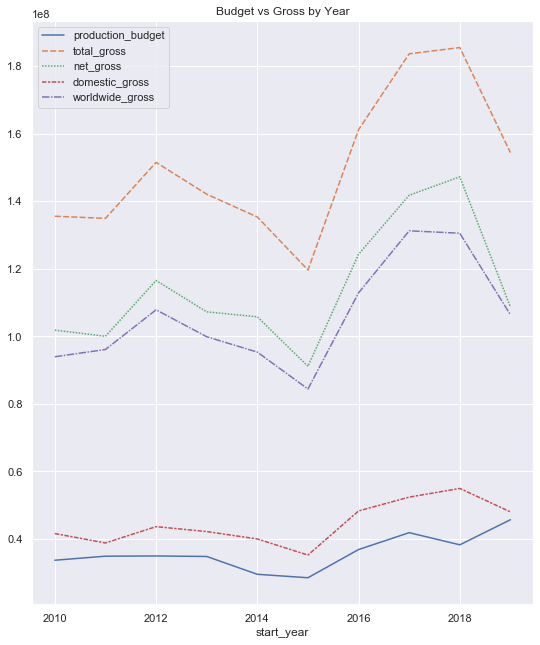

In [121]:
sns.lineplot(data=rev).set_title('Budget vs Gross by Year') 
sns.set(rc={'figure.figsize':(7,10)})

Text(0.5, 1.0, 'Distribution and Means of runtime')

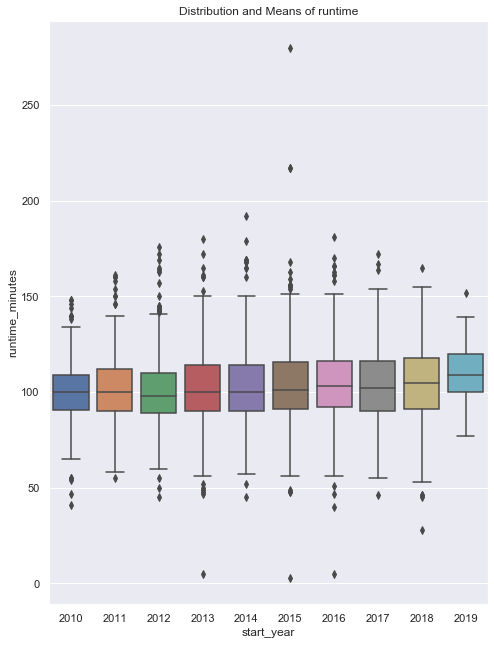

In [93]:
sns.boxplot(x="start_year", y="runtime_minutes", data=genre_budget)
sns.set(rc={'figure.figsize':(8,10)})
plt.title('Distribution and Means of runtime')

Text(0.5, 1.0, 'Distribution and Means of runtime')

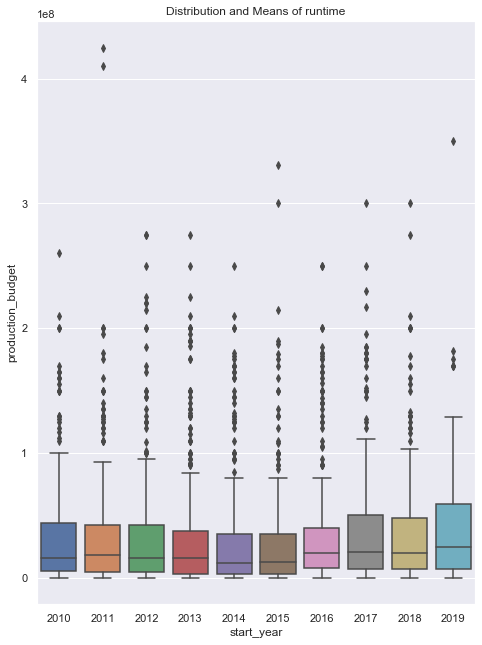

In [123]:
sns.boxplot(x="start_year", y="production_budget", data=genre_budget)
sns.set(rc={'figure.figsize':(8,10)})
plt.title('Distribution and Means of runtime')

In [96]:
#Genre popularity

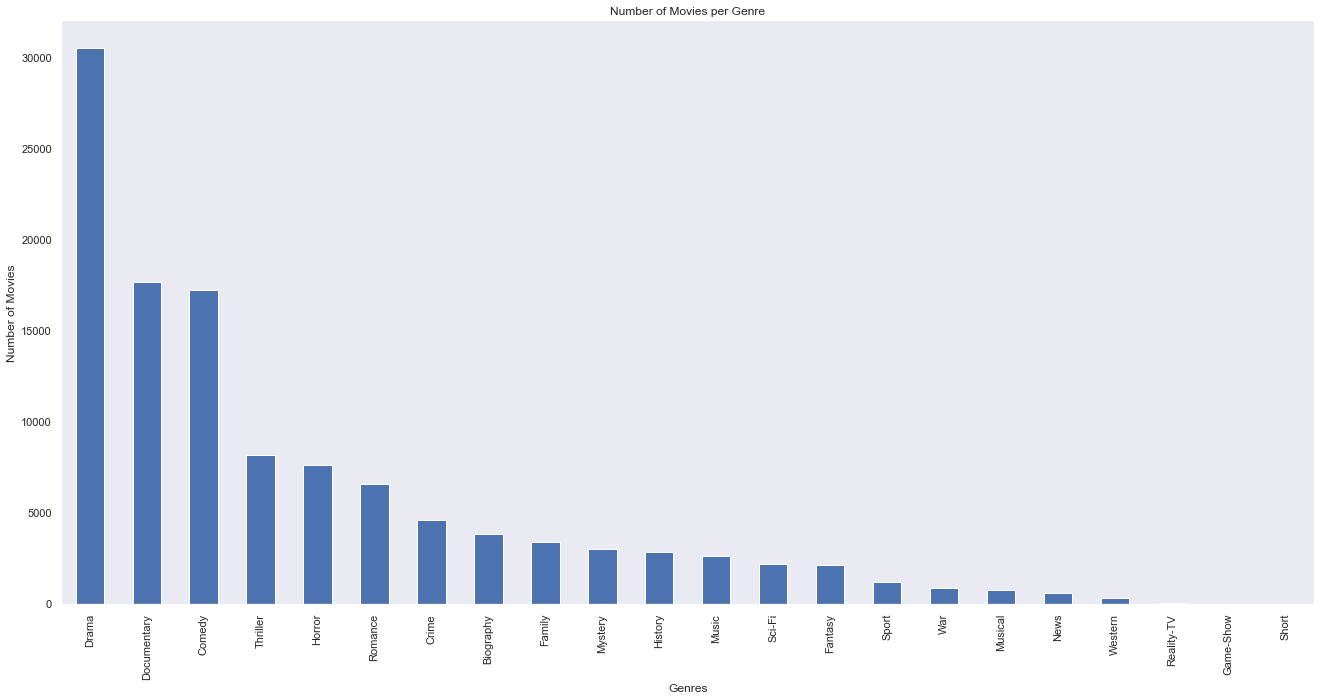

In [97]:
genre_a.iloc[:,10:].sum().sort_values(ascending = False).plot.bar(figsize = (20,10))
plt.title("Number of Movies per Genre")
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.grid()
plt.show()

In [98]:
genre_a.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes,genre_convert,Action,Adult,Adventure,Animation,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
2387,Inception,148.000000,"Action,Adventure,Sci-Fi",8.800000,1841066,"[Action, Adventure, Sci-Fi]",1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2241,The Dark Knight Rises,164.000000,"Action,Thriller",8.400000,1387769,"[Action, Thriller]",1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
280,Interstellar,169.000000,"Adventure,Drama,Sci-Fi",8.600000,1299334,"[Adventure, Drama, Sci-Fi]",0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
12072,Django Unchained,165.000000,"Drama,Western",8.400000,1211405,"[Drama, Western]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
325,The Avengers,143.000000,"Action,Adventure,Sci-Fi",8.100000,1183655,"[Action, Adventure, Sci-Fi]",1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [99]:
genre_a['runtime_minutes'].describe()

count   65210.000000
mean       94.766263
std       210.185627
min         3.000000
25%        81.000000
50%        91.000000
75%       104.000000
max     51420.000000
Name: runtime_minutes, dtype: float64

In [100]:
genre_a['numvotes'].describe()

count     72479.000000
mean       3589.322273
std       30576.647859
min           5.000000
25%          14.000000
50%          51.000000
75%         291.000000
max     1841066.000000
Name: numvotes, dtype: float64

In [101]:
genre_a[genre_a['numvotes'] < 15]

,primary_title,runtime_minutes,genres,averagerating,numvotes,genre_convert,Action,Adult,Adventure,Animation,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
20609,Memories of Iraq,15.000000,"Adventure,Documentary,History",5.400000,14,"[Adventure, Documentary, History]",0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
26132,Mero Love Story,nan,Romance,6.600000,14,[Romance],0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
72417,Good Morning Son,81.000000,Drama,7.100000,14,[Drama],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50441,Cinta Selamanya,nan,"Drama,Romance",6.800000,14,"[Drama, Romance]",0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9074,Snow,90.000000,"Drama,Romance",7.600000,14,"[Drama, Romance]",0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67698,Het zijn maar Duitsers,53.000000,Documentary,9.600000,5,[Documentary],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34755,Aschenbrödel und der gestiefelte Kater,60.000000,"Family,Fantasy",5.600000,5,"[Family, Fantasy]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11268,Ascent to the Sky,52.000000,Documentary,7.400000,5,[Documentary],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71461,My Polish Honeymoon,88.000000,Comedy,5.800000,5,[Comedy],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
18462  / len(genre_a)

0.25472205742352955

In [103]:
genre_a['numvotes'].std()

30576.647859191176

In [104]:
genre_a['numvotes'].mean()

3589.322272658287

In [105]:
genre_a.loc[genre_a['numvotes'] == genre_a['numvotes'].max()]

,primary_title,runtime_minutes,genres,averagerating,numvotes,genre_convert,Action,Adult,Adventure,Animation,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
2387,Inception,148.000000,"Action,Adventure,Sci-Fi",8.800000,1841066,"[Action, Adventure, Sci-Fi]",1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [106]:
#movies with valid notes
numvotes = genre_a.loc[genre_a['numvotes'] >= 15]

In [107]:
numvotes.describe()

,runtime_minutes,averagerating,numvotes,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
count,50250.000000,54017.000000,54017.000000,54017.000000,54017.000000,54017.000000,54017.000000,54017.000000,54017.000000,54017.000000,...,54017.000000,54017.000000,54017.000000,54017.000000,54017.000000,54017.000000,54017.000000,54017.000000,54017.000000,54017.000000
mean,97.772637,6.157091,4813.123868,0.107022,0.000037,0.056723,0.026584,0.049781,0.263102,0.071052,...,0.045615,0.006109,0.000185,0.101098,0.033175,0.000000,0.016587,0.125812,0.012163,0.004147
std,238.899234,1.432468,35335.528202,0.309144,0.006085,0.231314,0.160866,0.217493,0.440322,0.256914,...,0.208651,0.077923,0.013605,0.301461,0.179094,0.000000,0.127721,0.331641,0.109614,0.064263
min,5.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,84.000000,5.300000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,93.000000,6.300000,115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,105.000000,7.100000,523.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,51420.000000,10.000000,1841066.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000


In [108]:
numvotes.loc[numvotes['averagerating'] == 10]

,primary_title,runtime_minutes,genres,averagerating,numvotes,genre_convert,Action,Adult,Adventure,Animation,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
73616,Renegade,nan,Documentary,10.000000,20,[Documentary],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
#adding popular colum based on a condition of averagerating
numvotes['popular'] = np.where(numvotes['averagerating'] > 7.5, 1, 0)

C:\Users\9123\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [110]:
#creating dictionary
genre_detail = {}

for genre in genres_lists:
    genre_df = numvotes.loc[numvotes[genre] == 1]
    genre_popular = genre_df['popular'].sum()
    genre_unpopular = len(genre_df) - genre_popular
    pop_perc = genre_df['popular'].mean()
    unpop_perc = 1 - pop_perc
    
    genre_detail[genre] = {'Popular': genre_popular, 
                            'Unpopular': genre_unpopular, 
                            'Total': len(genre_df),
                            'Popular Percentage': pop_perc,
                            'Unpopular Percentage': unpop_perc}

In [111]:
# Creating a dataframe from that dictionary by using .T (transpose)
genre_details = pd.DataFrame(genre_detail).T

In [112]:
#dropping number of votes that are too few
too_few = [genre for genre in genre_details.index 
           if genre_details['Total'][genre] <= 10]

genre_details = genre_details.drop(index = too_few)

In [113]:
genre_details.reset_index()

,index,Popular,Unpopular,Total,Popular Percentage,Unpopular Percentage
0,Action,555.000000,5226.000000,5781.000000,0.096004,0.903996
1,Adventure,442.000000,2622.000000,3064.000000,0.144256,0.855744
2,Animation,209.000000,1227.000000,1436.000000,0.145543,0.854457
3,Biography,785.000000,1904.000000,2689.000000,0.291930,0.708070
4,Comedy,1268.000000,12944.000000,14212.000000,0.089220,0.910780
5,Crime,395.000000,3443.000000,3838.000000,0.102918,0.897082
6,Documentary,3961.000000,6343.000000,10304.000000,0.384414,0.615586
7,Drama,3128.000000,20915.000000,24043.000000,0.130100,0.869900
8,Family,404.000000,2187.000000,2591.000000,0.155924,0.844076
9,Fantasy,138.000000,1552.000000,1690.000000,0.081657,0.918343


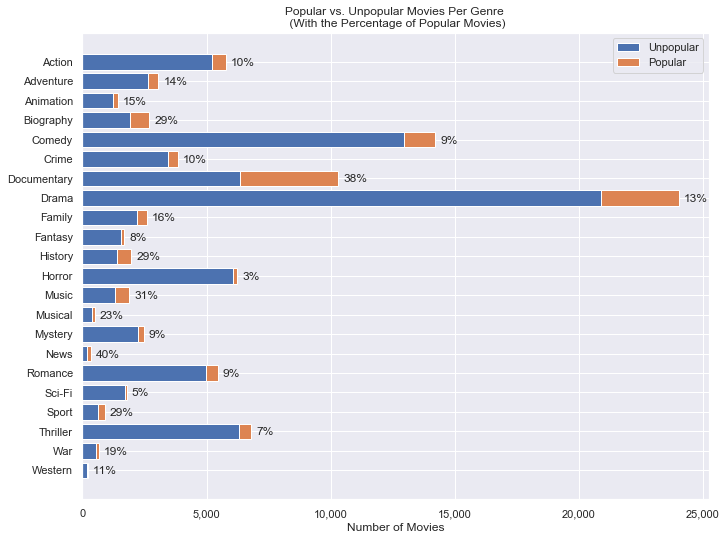

In [114]:
import matplotlib.ticker as ticker

plt.figure(figsize=(10,8))

# stacked horizonal bar charts
plt.barh(genre_details.index, genre_details['Unpopular'], label='Unpopular')
plt.barh(genre_details.index, genre_details['Popular'], 
         # here, left shows where the stack of the next part begins
         left = genre_details['Unpopular'], label='Popular')

# grabbing the current axis to format and annotate later
ax = plt.gca()

#inverting y axis so it shows in alphabetical order
ax.invert_yaxis()

# using this line to format the yaxis with commas
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

y = 0.2 # our start point on our y axis for the details
# Doing this for each genre
for row in genre_details.index:
    # getting the total for that genre
    x = genre_details['Total'][row]
    # getting the percentage of popular movies for that genre
    pop_perc = genre_details['Popular Percentage'][row]
    # formatting with f-strings so I can read easier
    percentage = f'{pop_perc * 100:,.0f}%' 
    # annotating the chart, locating the annotation at total + 200 and our y height
    ax.annotate(percentage,(x + 200, y))
    # adding 1 to our y for the next genre
    y += 1

plt.title("Popular vs. Unpopular Movies Per Genre \n (With the Percentage of Popular Movies)")
plt.xlabel("Number of Movies")
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


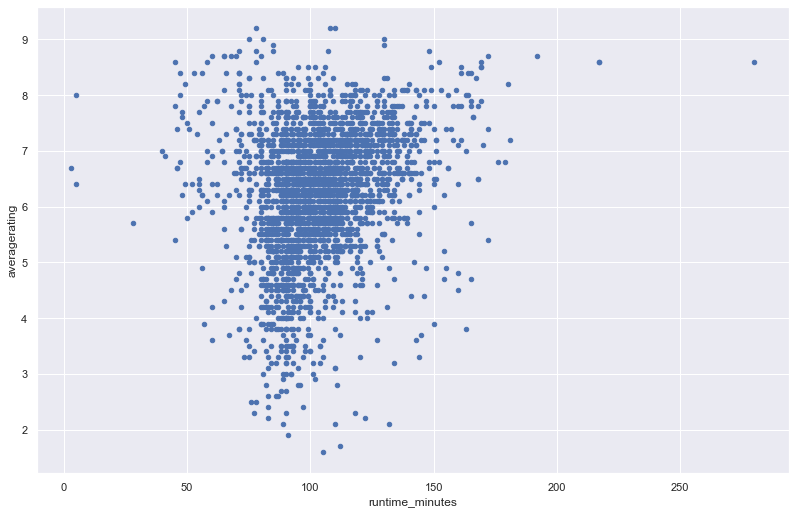

In [115]:
#does rating gets affected by runtime?
genre_budget.plot.scatter('runtime_minutes', 'averagerating', figsize = (12, 8))

In [116]:
genre_a.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes,genre_convert,Action,Adult,Adventure,Animation,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
2387,Inception,148.000000,"Action,Adventure,Sci-Fi",8.800000,1841066,"[Action, Adventure, Sci-Fi]",1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2241,The Dark Knight Rises,164.000000,"Action,Thriller",8.400000,1387769,"[Action, Thriller]",1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
280,Interstellar,169.000000,"Adventure,Drama,Sci-Fi",8.600000,1299334,"[Adventure, Drama, Sci-Fi]",0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
12072,Django Unchained,165.000000,"Drama,Western",8.400000,1211405,"[Drama, Western]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
325,The Avengers,143.000000,"Action,Adventure,Sci-Fi",8.100000,1183655,"[Action, Adventure, Sci-Fi]",1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


Text(0.5, 0.98, 'Average rating vs Net Gross')

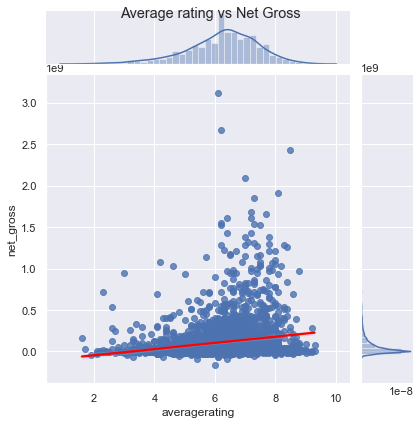

In [117]:
g = sns.jointplot(x="averagerating", y="net_gross", data=genre_budget, kind='reg')
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')
regline.set_zorder(5)
g.fig.suptitle("Average rating vs Net Gross")

In [118]:
#little Correlation between net gross and average ratings.

## Evaluation

* Question 1: Is it profitable to create film?<br>
→ Yes 72.2 % of movies had positive revenue. 
<br/><br/>
* Question 2: Which genres of movie made most popular?</br>
- Top 5 genres that were created were Drama, Documentary, Comedy, Thriller, and Horror
- Top 5 genres that were pouplar were Documentary, History, Biography, Music, and News 
<br/><br/>
* Question 3: Does the large budget movie brings more money?</br>
- In average, over the year, it seems like investing(production budget) and the total gross for domestic and worldwide have relationship. When the budget is high, the total gross goes higher, when budget is low, the total gross is lower in average
<br/><br/>
* Question 4: Running time could be a huge factor of popularity of the movie?</br>
- There is a little correlation between average rating and net gross.

## Conclusions

Starting movie business seems not bad. As you can see, most movies(72.2%) made more than the budget. Highest net gross movies are not always the most highest average rate nor most reviewed. As far as genres, Comedy Drama seems like safest bet since both genres are popular genre. Comedies, Documentaries and Dramas have a lot of popular movies, in terms of counting numbers. But News, Documentaries and Music have a lot of popular movies, in terms of popularity percentages.
***
